## Neural Network Solution

### Formulate the Problem

As our lives become more and more involved with technology and social media, we have been exposed to online bullying and harrassment. The internet does not have an HR representitive that a business would have and thus the internet world is often very unprofessional and downright hateful. We can experience this type of behavior on social media such as instagram posts or X comments that can be personal attacks. Last month, I found out that my wife is pregnant, so I am preparing myself to bring a child into this beautiful, cruel world. I want to be able to protect my child from online bullying and I am not alone. Social media companies have been adding protective measures to decrease these attacks that are called "toxic comments" and they have been measured by comment toxicity. The Pew research center has concluded a study that 46% of children from the age of 14 and under have experienced some form of online bullying (Vogels, 2022). We can create a NLP model that will learn what words are and the context in which they are used to stop these hateful comments. In this assignment, I have used the Kaggle dataset called "Toxic Comment Classification Challenge" to identify the toxic language. In practice, if successful, this would be passed on to software developers who can implement blocking techniques so that the language never sees the public screen. 

To create the model I will first be importing some libraries that I will be using for data processing such as pandas, numpy, and tensorflow. I will be using tensorflow to create a dataset that will be preprocessed using TextVectorizer. This will make it very easy to preprocess our data in one step without having to worry about punctuation white space and stop words like we would for sentiment analysis models using Naive Bayes or other algorithms. Once the data is tokenized, I will be creating a neural network by embedding our tokens and using two Bidirectional GRU layers to work with the sequential data. Bidirectional data is useful in text chains because the words before and after the word we are currently working with can drastically change the meaning of a sentence. I have chosen to use the Gated Recurrent Unit layer over the LSTM layer because it simplifies the model into having only an input gate and a forget gate. These are combined using a gate controller and if a 1 is given then the forget gate is open and the input gate is closed (Géron, 2019). 

In [1]:
!pip install tensorflow

In [2]:
!pip install matplotlib seaborn

In [58]:
# import libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Descriptive Analysis of Data

This data consists of over 150,000 comments with six different categories of toxic comments. When toxic comments appear on different platforms it is important to be able to disable them and also identify what kind of toxic comment they are. For example a threat may be something that needs to be followed up on more than just a toxic comment itself. The categories are:
+ toxic
+ severe toxic
+ obscene
+ threat
+ insult
+ identity hate

In [59]:
# import the data
df = pd.read_csv("C:/Users/ryans/Documents/Neural Netwoks-Deep Learning/Neural Network Solution/toxic-comment-classification/train.csv/train.csv")

In [60]:
# view first 5 rows
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [61]:
# view last 5 rows
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


Now we shrink the data due to long run times. In practice, we will be working with nuch more computational power. This will most likely cause our model to lose accuracy but will still give us an idea that we are on the right track with our model creation.

In [62]:
# shrink our data so we do not work with so many comments
df = df.sample(10000)

In [63]:
len(df)

10000

#### EDA / Target Variable Plot

In our data the target variable consists of 6 different categories of toxic comments. We can think of these as all being toxic comments but with different criteria such as threat being a comment that may send fear to someone whereas identity_hate may be a racist or homophobic comment. Some of the comments can be multiple categories at once. Now we can see value counts and plot the data to see what type of comments we are dealing with, and which are the most common. 

In [64]:
# view count of toxic comments
df['toxic'].value_counts()

toxic
0    9075
1     925
Name: count, dtype: int64

In [65]:
# view severe toxic comments
df['severe_toxic'].value_counts()

severe_toxic
0    9905
1      95
Name: count, dtype: int64

In [66]:
# view obscene comments
df['obscene'].value_counts()

obscene
0    9491
1     509
Name: count, dtype: int64

In [67]:
# view insult comments
df['insult'].value_counts()

insult
0    9525
1     475
Name: count, dtype: int64

In [68]:
# view threat comments
df['threat'].value_counts()

threat
0    9966
1      34
Name: count, dtype: int64

In [69]:
# view identity hate
df['identity_hate'].value_counts()

identity_hate
0    9922
1      78
Name: count, dtype: int64

From our graph, we can see that out of the 6 categories, most of the toxic comments are labeled as toxic with threat being the least likely.

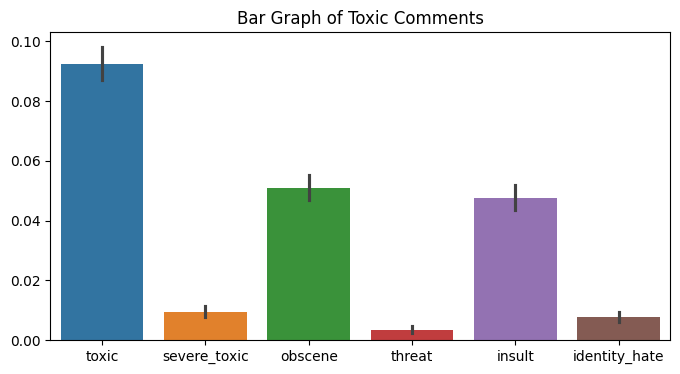

In [71]:
# plot our data
plt.figure(figsize=(8,4))
sns.barplot(df)
plt.title('Bar Graph of Toxic Comments')
plt.show()

#### Graphic Language Warning
While working with real data and real-world problems we will sometimes find unprofessional language and even hate speech. I appologize for the obscene language but we are trying to protect those online from this type of behavior. As we can see from the insults below these are horrible things to say but are found frequently online. When living with a Christian Worldview, we always try to ensure that everyone is treated equally and fairly. If someone is greeted with one of these comments online it would make them feel very badly or even scared. This is something that happens often online and our focus is to get these comments blocked.

In [72]:
# view some insults
df[df['insult'] == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
153351,9babf511cc520560,"""\n\n More Vandalism \nCan somebody show me ho...",1,0,0,0,1,0
16084,2a73476b5227617e,"""\n\n it seems that you are very busy in pushi...",1,0,1,0,1,0
16113,2a87fe6116dd5766,"Neither was your mum, when I had sex with her",1,0,0,0,1,0
133467,ca0689aac86f8cc1,What a lying BITCH!!! Look at this shyt \n\nht...,1,0,1,0,1,0
87855,eb07e2bded5e7cba,!!! NO ONE CAN KEEP ME FROM HERE YOU DUMB PIEC...,1,0,1,0,1,0


### Preprocessing Steps Start Here

### Tokenize the words
The first step in our preprocessing is to tokenize the words. Tokenizing the words means that we separate the string into separate words. We do this because each word will be given its own numerical representation and then we use an embedding technique. This can be done using the nltk library where we would tokenize the word, delete stop words, and remove puncuation. To make things easier, I will be using TextVectorization from tensorflow.keras.layers that will do all of this for us. This is how the data is going to be cleaned and standardized. It is standardized by splitting the words, lowercasing the words, and removing puncuation all in one step. 

In our data we have one feature which will be the "comment_text" column, however, this will be much larger once the words are tokenized and embedded. We then have 6 target variables which are the possible toxic comment categories. The outliers in our data are handled by setting our max vocabulary words and comment length. Once our top 100,000 words are met, the rest of the words are tokenized with a 0. Any sentence that is not the same length as our max sentence lenth will also be padded with zeros. We can use **max_zero=True** in our embedding layer so that the model will not need to learn that these padding layers should be ignored. However, if we do not include it, the model should be able to learn this as well. 

In [73]:
# import TextVectorization
from tensorflow.keras.layers import TextVectorization

In [75]:
# create X an y. Comments are X and Toxic Categories are y
X = df['comment_text']
y = df[df.columns[2:]]

In [76]:
# change y to arrays
y = y.values

In [77]:
# view y
y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [78]:
# view X
X

92726     "\n\n ? No. That's your interpretation. I simp...
153351    "\n\n More Vandalism \nCan somebody show me ho...
9834      "\n\n Comments \n\nPer ""Note that in many cas...
70325     Medium Pimpin & Live Prayer \n\nHi Merope,\n\n...
125527    ".  He received approx $2 million from Copelan...
                                ...                        
123998               Vandalism? What are you talking about?
89327     ", especially how it relates to the expression...
13193                 |unblock| all of you can suck my dick
94315     "\n\n Geez Hesp, as well as being a coward you...
44037     You and your friends are 13 years old, in eigh...
Name: comment_text, Length: 10000, dtype: object

In [79]:
# set max vocab words and sentence length
vocab_words = 100000

This is where our model will be standardized sort of like an sklearn StandardScaler where we first create the shell then fit and transform our data. The vectorizer will use 1000 words with a sentence length of 500 characters that will be transformed into integers. These numbers will help dictate the results from our model. The larger the numbers, the more our model can learn but the model will grow very large in size very quickly. We then use **adapt** to fit it to our X data and use .values to transform it into a numpy array like we have done with our LSTM model project. 

In [80]:
# create vectorizer
vectorizer = TextVectorization(max_tokens = vocab_words, output_sequence_length= 500,
                              output_mode = 'int')

In [81]:
# fit to vectorizer
vectorizer.adapt(X.values)

Here we see that the word "you" has been numerically represented as the number 8. It is lowercased because that is part of the standardizing that TextVectorization does for us.

In [83]:
# can view the vocabulary if we want 
vectorizer.get_vocabulary()[8]

'you'

In [84]:
# view some of the vocabulary
vectorizer.get_vocabulary()[5:10]

['a', 'and', 'i', 'you', 'is']

In [85]:
# Check the numerical representation of this sentence
vectorizer("Shut up, I hate you!")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1760,   84,    7,  892,    8], dtype=int64)>

In [86]:
# set our standardized data as tokenized
tokenized = vectorizer(X.values)

The zeros we see at the end of the array are padded. This is because the sentence was not that long.

In [87]:
# now we are vectorized - 0 means was not 500 long
tokenized

<tf.Tensor: shape=(10000, 500), dtype=int64, numpy=
array([[   53,   193,    21, ...,     0,     0,     0],
       [   60,   242,    40, ...,     0,     0,     0],
       [  210,   461,   186, ...,     0,     0,     0],
       ...,
       [  873,    45,     4, ...,     0,     0,     0],
       [11312, 15735,    18, ...,     0,     0,     0],
       [    8,     6,    21, ...,     0,     0,     0]], dtype=int64)>

### Create Dataset
This portion is very similar to our CNN project. Here we will be using the help of tf.data.Dataset to create a dataset in the correct format for us to work with. This will also shuffle our data and create batches of comments for us. 

In [88]:
# create dataset using our tokenized comments
dataset = tf.data.Dataset.from_tensor_slices((tokenized, y))

In [89]:
# pipeline
dataset = dataset.cache()
dataset = dataset.shuffle(11000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

We have some toxic comments in this batch. The first part of the array you see here is the comments in their tokenized form and the second array is the target variables for each of the comments. There are 16 because each batch is 16 comments long. We see many of the first comments do not contain any of the 6 toxic traits.

In [91]:
# random batch
dataset.as_numpy_iterator().next()

(array([[   8,  224,  179, ...,    0,    0,    0],
        [  88,  830,   46, ...,    0,    0,    0],
        [ 134,    3,    2, ...,    0,    0,    0],
        ...,
        [4399,  259,   32, ...,    0,    0,    0],
        [1393, 1187,  513, ...,    0,    0,    0],
        [2865,    7,  580, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

The data comes with a test set but with the data being so large we will just use a portion of the training data for our test data. We then use our tf.data.Dataset library to split our data into training and testing splits. Once our model is created we will test the data using the same batches of 16 comments at a time. The code for the neural network with NLP using a GRU layer is similar to what is used in Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow so I would like to reference the author, Géron, A., because without his work I would not have the coding ability that I have today when using TensorFlow and Keras to build networks such as this.  

In [92]:
# create partitions
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [93]:
# import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Embedding

In [108]:
model = Sequential()

# Embedding layer - words will have multiple numerical representations
model.add(Embedding(vocab_words+1, 16))

# Bidirectional GRU Layer for sentences
model.add(Bidirectional(GRU(32, activation = 'tanh', return_sequences=True)))

model.add(Bidirectional(GRU(32)))

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [109]:
# compile the model
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [110]:
# fit our model
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
437/437 [==============================] - 142s 309ms/step - loss: 0.1396 - val_loss: 0.0700
Epoch 2/5
437/437 [==============================] - 141s 322ms/step - loss: 0.0701 - val_loss: 0.0528
Epoch 3/5
437/437 [==============================] - 140s 319ms/step - loss: 0.0492 - val_loss: 0.0389
Epoch 4/5
437/437 [==============================] - 140s 321ms/step - loss: 0.0421 - val_loss: 0.0397
Epoch 5/5
437/437 [==============================] - 140s 320ms/step - loss: 0.0351 - val_loss: 0.0300


### Plot of Model History

We created a plot very similar to this in our CNN model. This plot shows the loss and validation loss over the 5 epochs and we want to see our loss and val_loss following eachother closely towards 0. Many times the learning rate will be flat which would signify overfitting but that does not appear to be the case here. 

<Axes: >

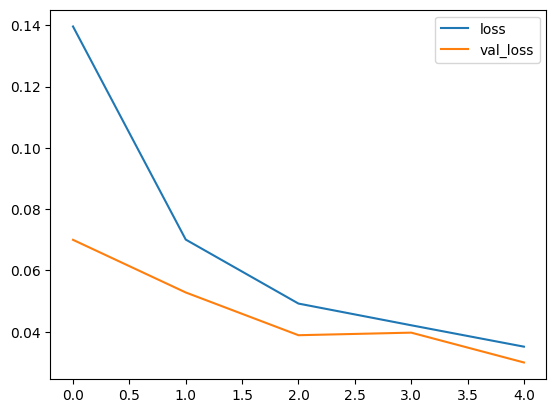

In [111]:
# plot the losses
pd.DataFrame(history.history).plot()

### Predictions

Now we can test our model on two new comments. The first comment will not be toxic so we would like to see small numbers for each of our 6 categories. From **result1** we see that we are getting exactly what we have hoped for as every number is small. The second comment contains toxic language but is not overly toxic or obscene so these numbers should be larger than the previous comment for our first category but not very close to one for any others. From **result2** we see that we are getting a very high number for the toxic category and somewhat high for obscene and insult. I would like the insult to be higher but for a simple model with only 5 epochs due to computer capabilities, I will take it. 

In [112]:
# sample text of non toxic comment
new_text = vectorizer('I love data science')

In [113]:
# store results in result1 variable
result1 = model.predict(np.expand_dims(new_text, 0))

1/1 [==============================] - 1s 1s/step


In [114]:
# view results
result1

array([[1.0337840e-03, 3.2887758e-07, 4.4794942e-05, 2.4279761e-05,
        5.3742428e-05, 1.6051887e-05]], dtype=float32)

In [115]:
# toxic comment
new_text = vectorizer('I hate you so much loser!')

In [116]:
# store as result2
result2 = model.predict(np.expand_dims(new_text, 0))

1/1 [==============================] - 0s 78ms/step


In [117]:
# view toxic results
result2

array([[0.85131246, 0.00372517, 0.0688486 , 0.02157581, 0.20283325,
        0.02443411]], dtype=float32)

### Test Data Metrics

In [118]:
# import the metric we will be using
from tensorflow.keras.metrics import CategoricalAccuracy

In [119]:
# set up shell for metrics
cat_acc = CategoricalAccuracy()

In [120]:
# get all of our testing data batches 
for batch in test.as_numpy_iterator():
    
    # grab X true and y true values
    X_true, y_true = batch
    
    # make predictions using model
    pred = model.predict(X_true)
    
    # flatten values so each prediction is not a different array
    y_true = y_true.flatten()
    pred = pred.flatten()
    
    # accuracy
    cat_acc.update_state(y_true, pred)

1/1 [==============================] - 0s 86ms/step


### Conclusion

After making predictions we see that our model is not performing too well. This model seems to do well with the toxic comment since it is the most likely outcome but has failed to learn much about the other types of comment toxicity. However, if you remember, we downsampled our data and only ran 5 epochs with a fairly shallow neural network. This is because the data is massive and I do not have a GPU so I had to keep my model simple and my data small. This is also why I choose my sentence length to be a max of 500 words and the vocabulary to be only 100,000 words. The state of the art NLP models use over 1 million words so their results will be much better. I also chose to have only 16 embeddings for each word but many models will have much more sometimes even 1000 embeddings per word. If we were to run more epochs and have more Bidirectional GRU layers the results would be better. After plugging in one comment that was not toxic and another comment that was, we saw that we accurately classified them. This model can help ensure that hateful speech is not posted on public forums and other social media to help protect those who are involved. 

In [121]:
# view the accuracy
cat_acc.result().numpy()

0.5967742

#### References

cjadams, Jeffrey Sorensen, Julia Elliott, Lucas Dixon, Mark McDonald, nithum, Will Cukierski. (2017). *Toxic Comment Classification Challenge*. Kaggle. https://kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge

Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow*. Kiwisoft S.A.S.

TensorFlow. (2023). *tf.keras.layers.TextVectorization*. https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

Vogels, E., A. (2022). *Teens and Cyberbullying 2022*. https://www.pewresearch.org/internet/2022/12/15/teens-and-cyberbullying-2022/

